Data Loading and Initial Inspection

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
print(df.head())
print(df.info())
print(df.describe())

   VIN (1-10)     County     City State  Postal Code  Model Year    Make  \
0  5YJSA1E22K       King  Seattle    WA      98112.0        2019   TESLA   
1  3MW39FS05R     Yakima   Zillah    WA      98953.0        2024     BMW   
2  1N4AZ0CP0F       King     Kent    WA      98031.0        2015  NISSAN   
3  5YJSA1H20F  Snohomish  Bothell    WA      98012.0        2015   TESLA   
4  JTMAB3FV1N     Yakima   Yakima    WA      98908.0        2022  TOYOTA   

        Model                   Electric Vehicle Type  \
0     MODEL S          Battery Electric Vehicle (BEV)   
1        330E  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     MODEL S          Battery Electric Vehicle (BEV)   
4  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             270   
1             Not eligible due to low battery range       

Data Cleaning

In [3]:
import pandas as pd
print("Initial null values per column:")
print(df.isnull().sum())
df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)
df.dropna(subset=['Make', 'Model'], inplace=True)
df['Model Year'] = df['Model Year'].astype(int)
print("\nFinal null values per column after cleaning:")
print(df.isnull().sum())

# Remove outliers
Q1 = df['Electric Range'].quantile(0.25)
Q3 = df['Electric Range'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Electric Range'] >= lower_bound) & (df['Electric Range'] <= upper_bound)]

# Display basic info to see data types and row count after cleaning
print("\nDataframe information after cleaning:")
print(df.info())

Initial null values per column:
VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4

<ipython-input-3-4dd8fef06f55>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)


VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

Dataframe informa

Descriptive Statistics and Distribution Exploration

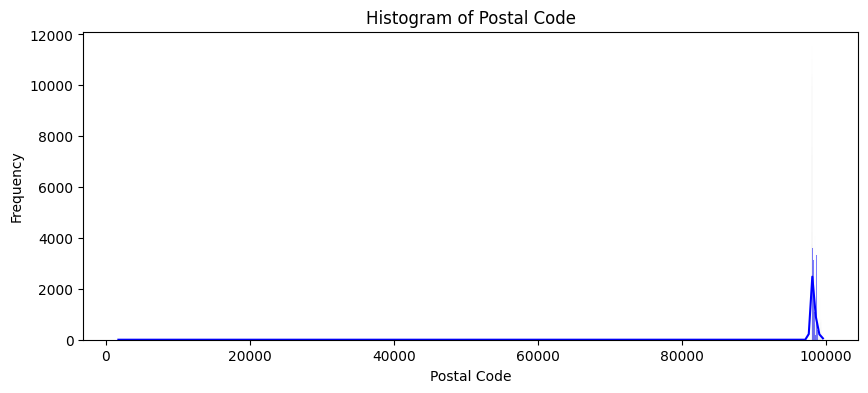

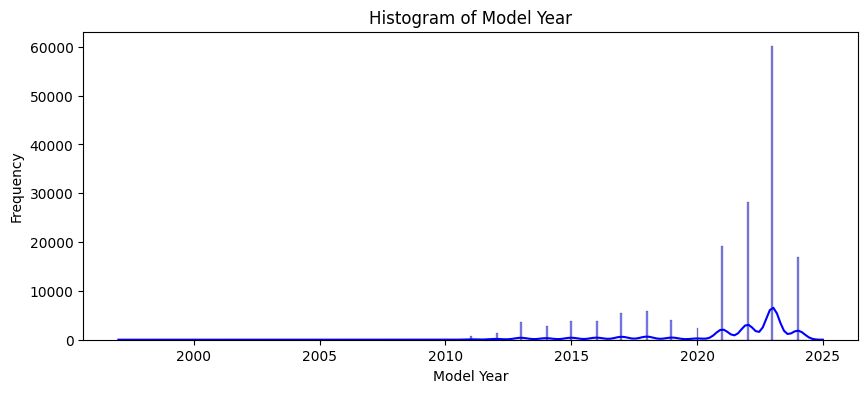

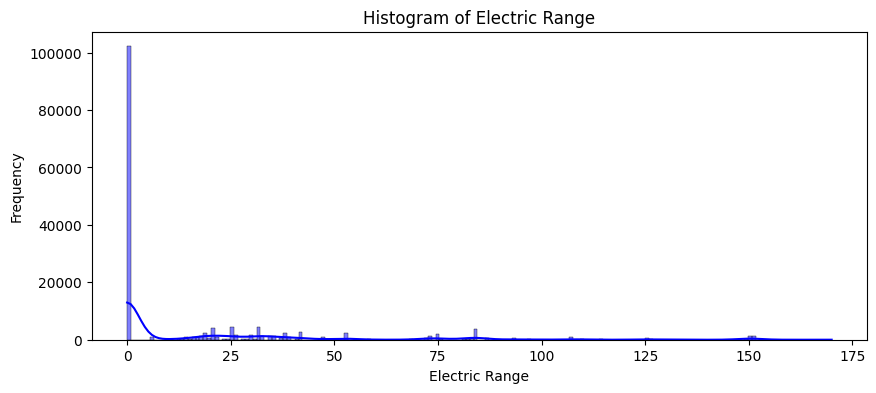

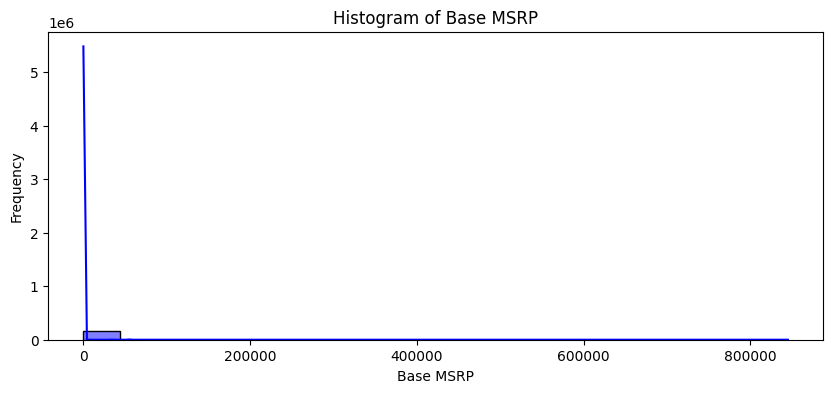

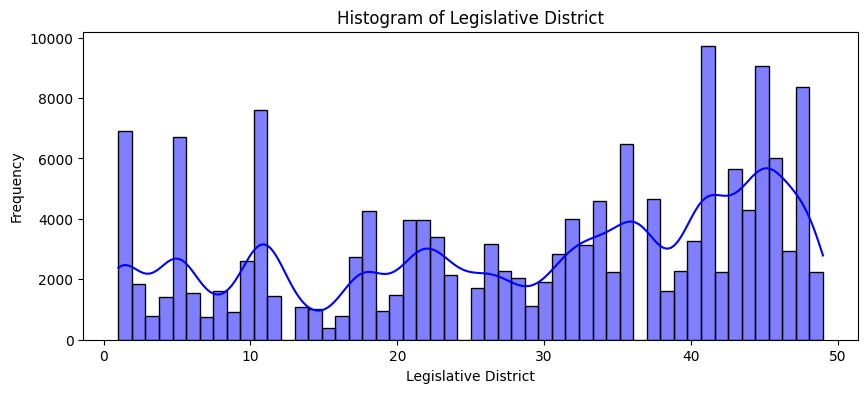

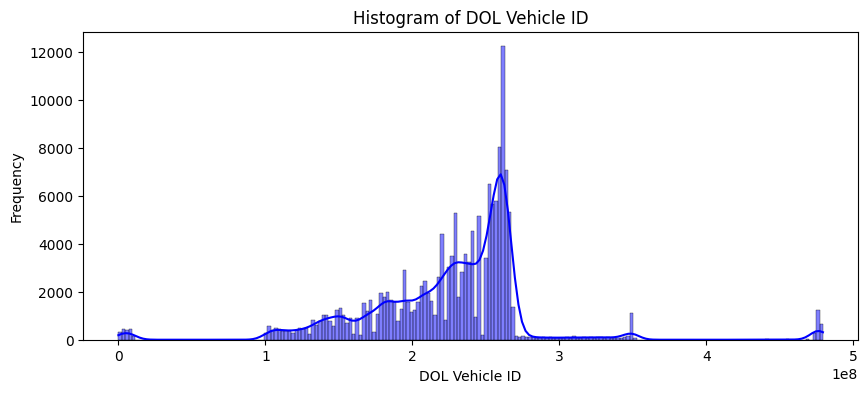

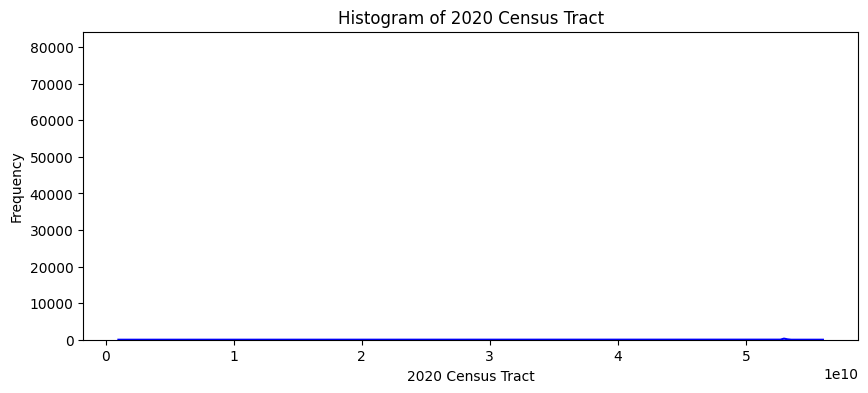

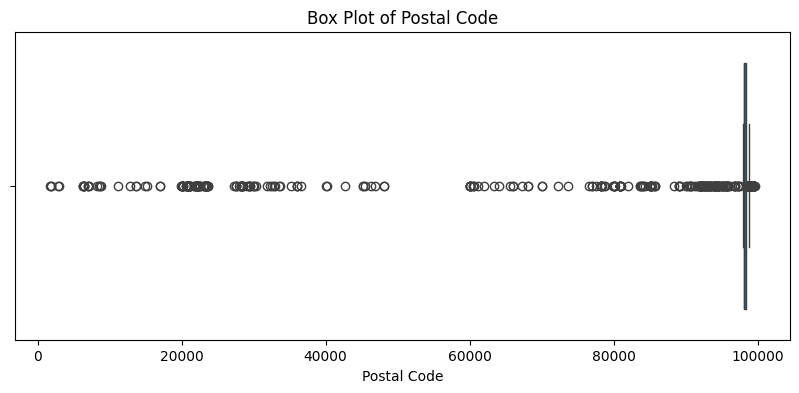

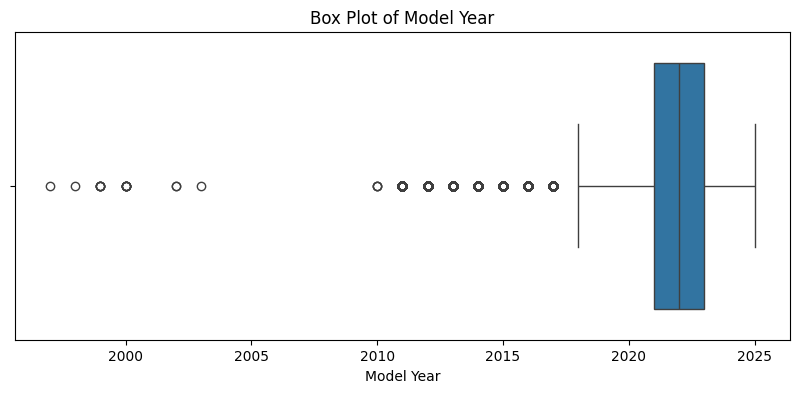

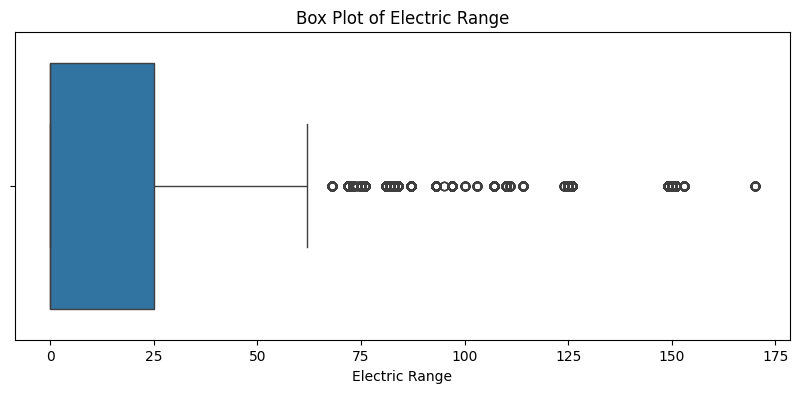

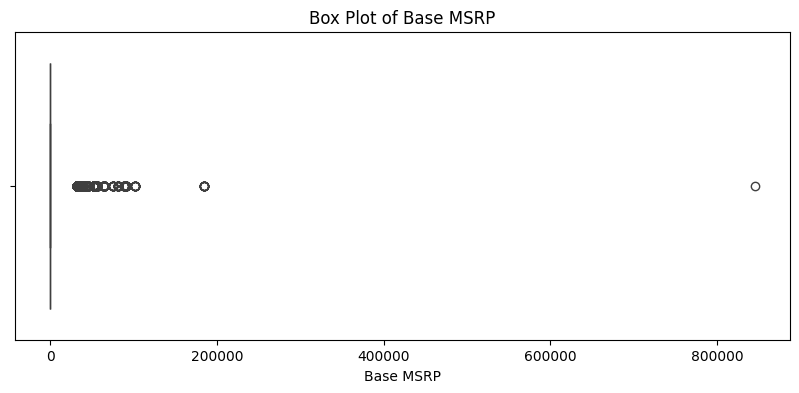

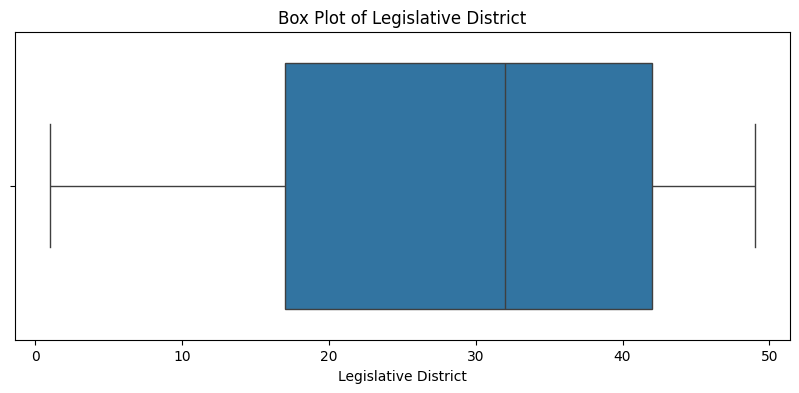

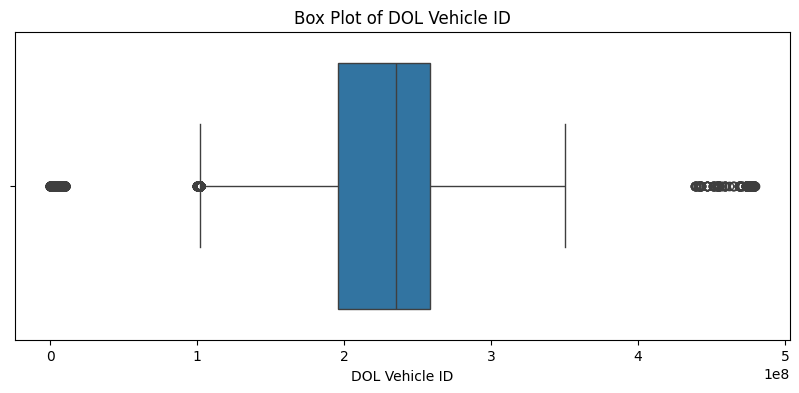

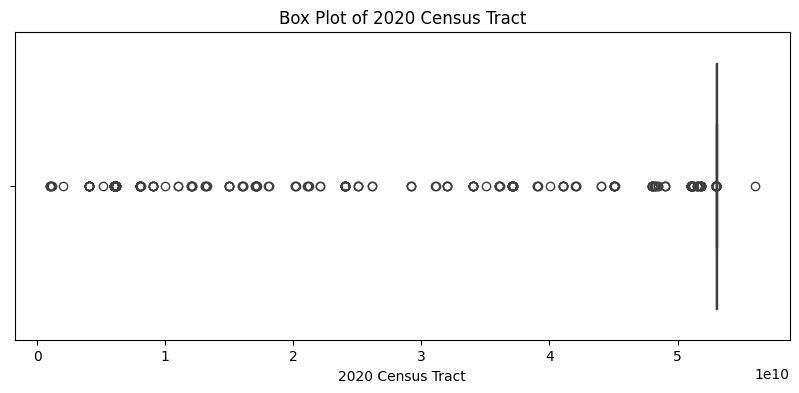

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

Data Visualization for Categorical and Numerical Attributes

<ipython-input-5-2b6ce09f1e7a>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


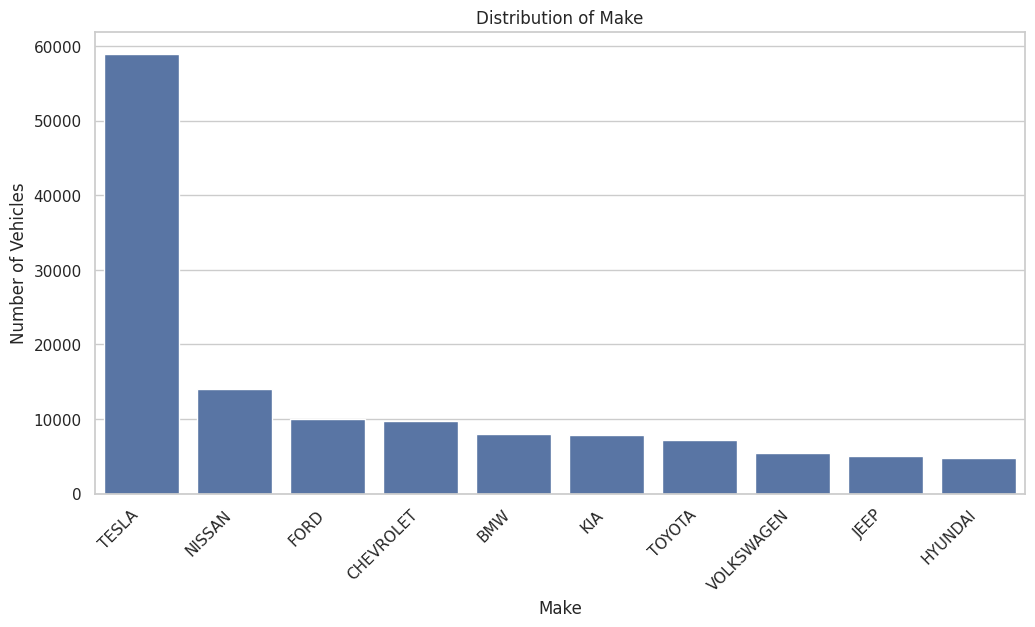

<ipython-input-5-2b6ce09f1e7a>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


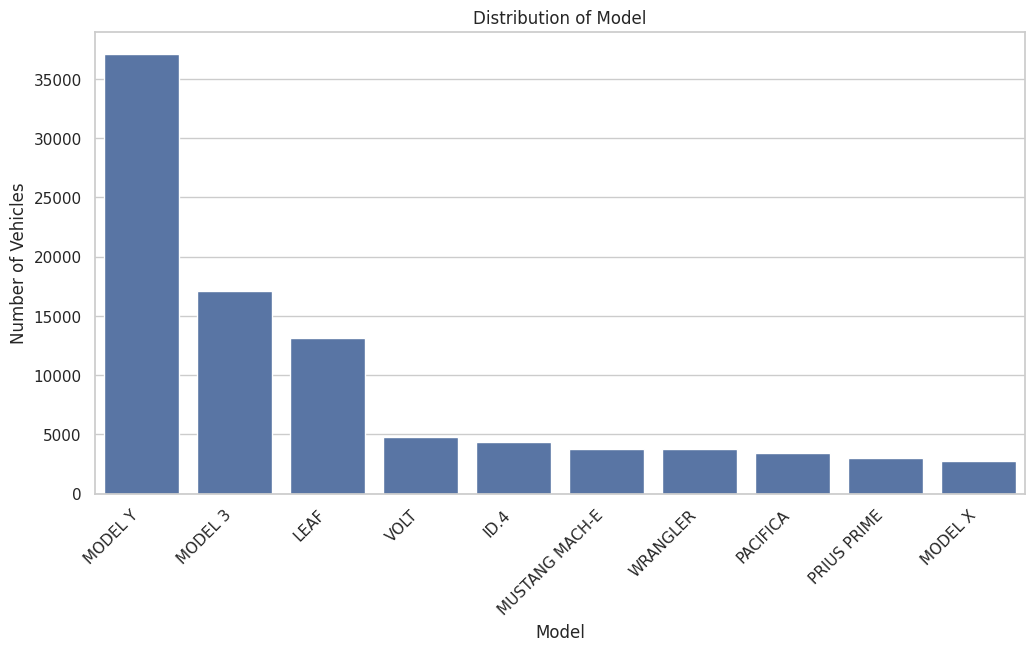

<ipython-input-5-2b6ce09f1e7a>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


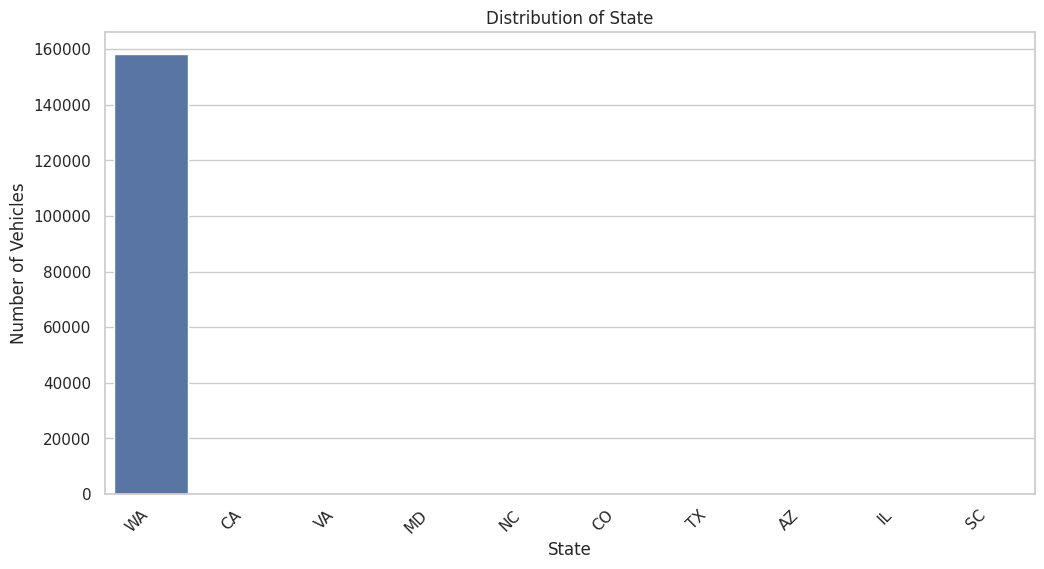

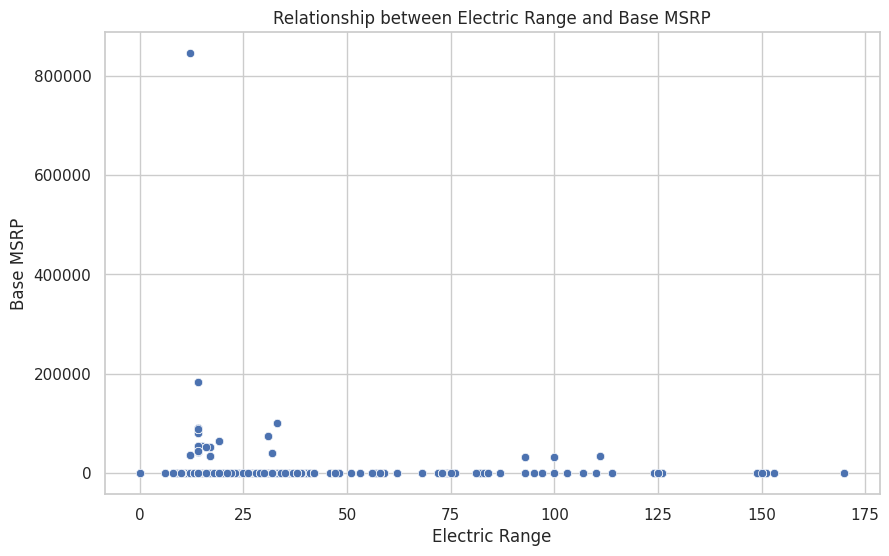

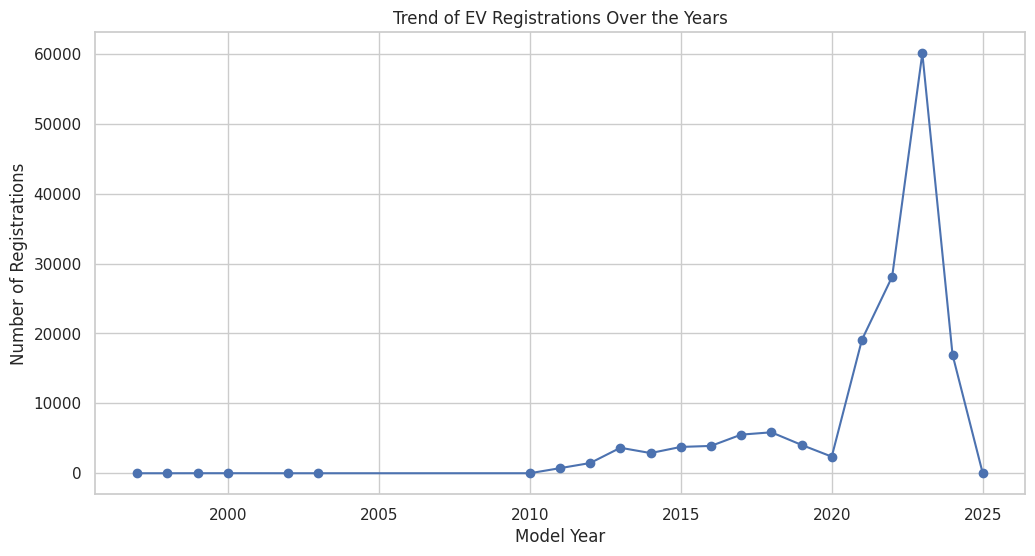

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Visualization of categorical data using bar charts
categorical_columns = ['Make', 'Model', 'State']
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    chart = sns.countplot(x=col, data=df, order=df[col].value_counts().index[:10])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Number of Vehicles')
    plt.xlabel(col)
    plt.show()

# Visualization of numerical data
# Scatter plot to show the relationship between 'Electric Range' and 'Base MSRP'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=df)
plt.title('Relationship between Electric Range and Base MSRP')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.show()

# Line chart for analyzing trends over years
# Grouping data by 'Model Year' and counting entries
yearly_counts = df.groupby('Model Year').size()
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o')
plt.title('Trend of EV Registrations Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.show()

Time Series Analysis Techniques for EV Registrations



1.   Trend Analysis with Moving Averages



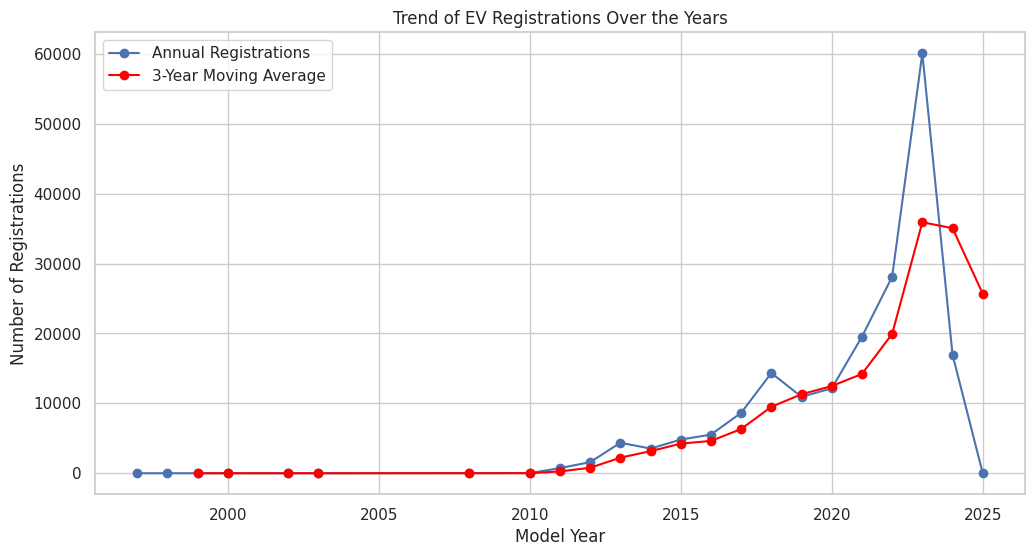

In [13]:
df['Model Year'] = df['Model Year'].astype(int)
yearly_registrations = df.groupby('Model Year').size()
# Calculate the moving average with a window of 3 years
moving_avg = yearly_registrations.rolling(window=3).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_registrations, marker='o', linestyle='-', label='Annual Registrations')
plt.plot(moving_avg, color='red', marker='o', linestyle='-', label='3-Year Moving Average')
plt.title('Trend of EV Registrations Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')
plt.legend()
plt.grid(True)
plt.show()

Correlation Analysis

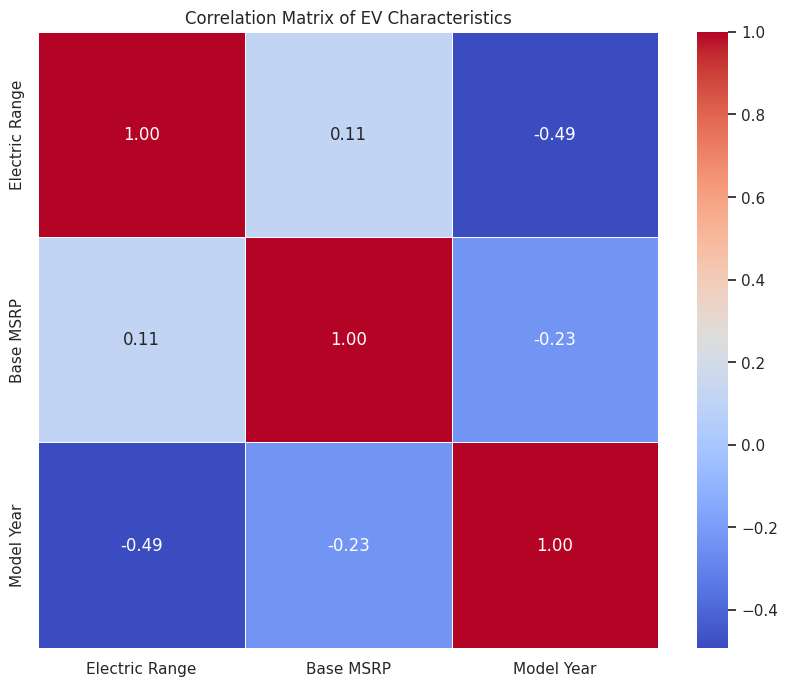

In [17]:
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = df[['Electric Range', 'Base MSRP', 'Model Year']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of EV Characteristics')
plt.show()

Feature Engineering and Advanced Visualization

In [18]:
# Calculating the age of the vehicle from the 'Model Year'
df['Vehicle Age'] = 2024 - df['Model Year']  # Assuming the current year is 2024
# Price Range Category
bins = [0, 30000, 60000, 90000, float('inf')]
labels = ['Budget', 'Mid-range', 'Premium', 'Luxury']
df['Price Range'] = pd.cut(df['Base MSRP'], bins=bins, labels=labels)

# Save the updated DataFrame
df.to_csv('Updated_Electric_Vehicle_Population_Data.csv', index=False)

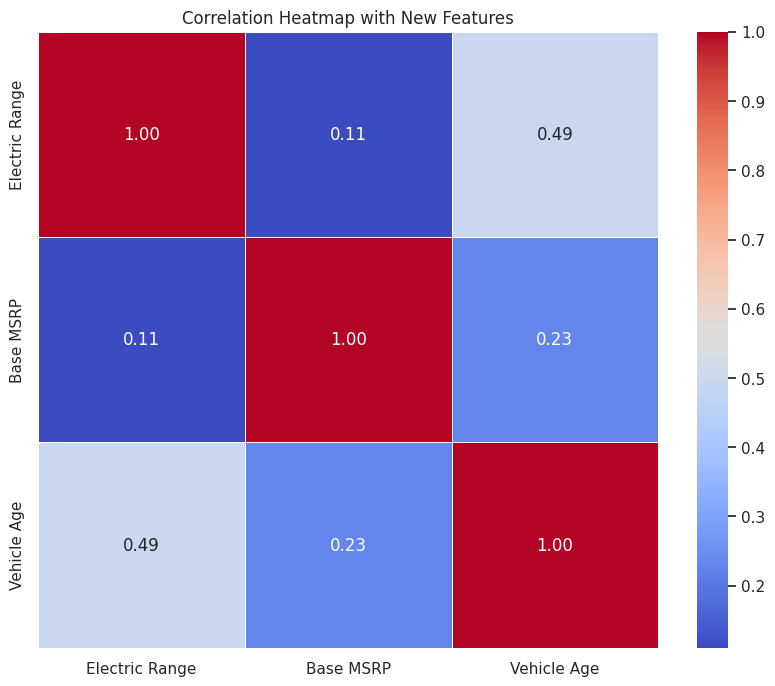

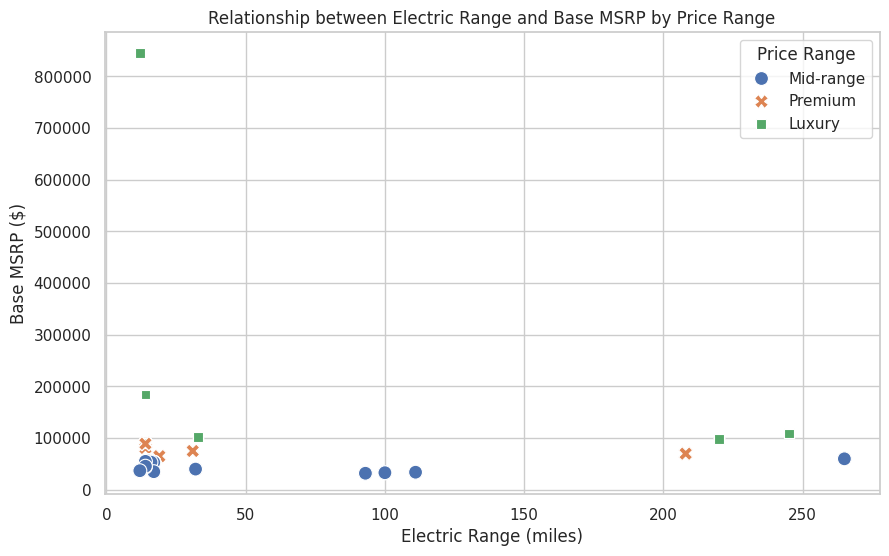

In [19]:
df = pd.read_csv('Updated_Electric_Vehicle_Population_Data.csv')

# Correlation Heatmap for selected features
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Electric Range', 'Base MSRP', 'Vehicle Age']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap with New Features')
plt.show()

# Scatter Plot to explore relationships between continuous variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Electric Range', y='Base MSRP', hue='Price Range', style='Price Range', s=100)
plt.title('Relationship between Electric Range and Base MSRP by Price Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.legend(title='Price Range')
plt.grid(True)
plt.show()

Model Year and Make & Model Analysis

<ipython-input-20-6ccb2b518d85>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_year_distribution.index, y=model_year_distribution.values, palette='viridis')


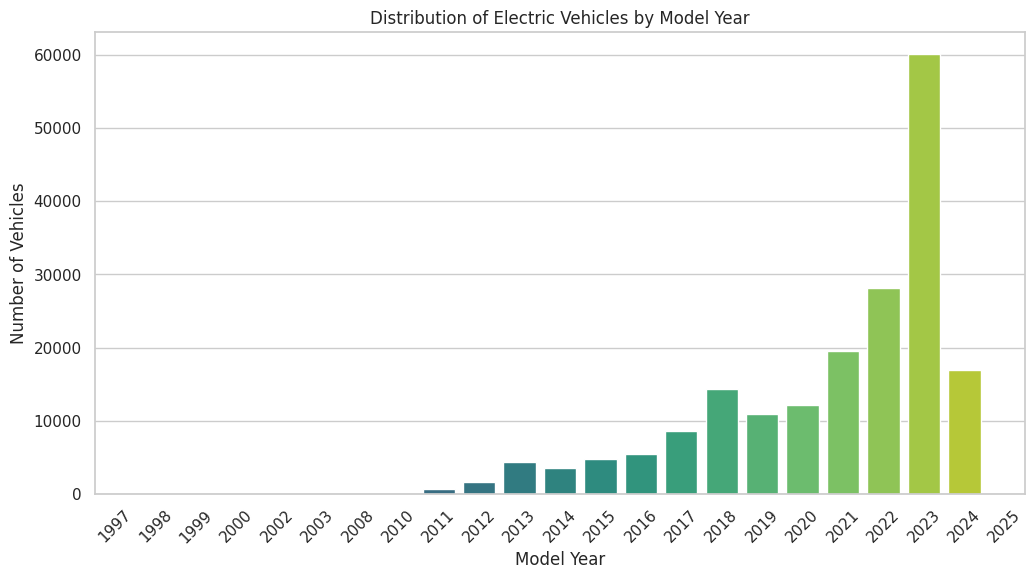

In [20]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
model_year_distribution = df['Model Year'].value_counts().sort_index()

# Plotting the distribution of Model Years
plt.figure(figsize=(12, 6))
sns.barplot(x=model_year_distribution.index, y=model_year_distribution.values, palette='viridis')
plt.title('Distribution of Electric Vehicles by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

<ipython-input-21-83efc453c815>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=make_model_distribution.values, y=make_model_distribution.index, palette='coolwarm')


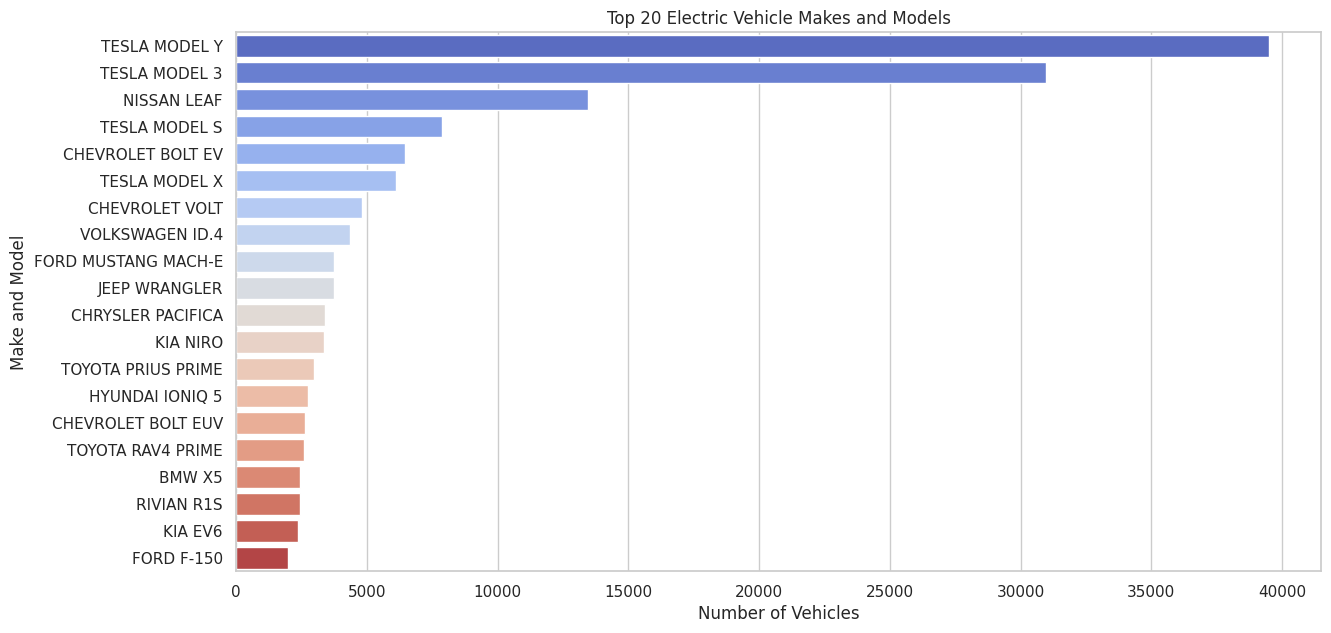

In [21]:
# Creating a new column combining Make and Model for detailed analysis
df['Make and Model'] = df['Make'] + " " + df['Model']
make_model_distribution = df['Make and Model'].value_counts().head(20)  # Limit to top 20 for clarity

# Plotting the frequency of top Makes and Models
plt.figure(figsize=(14, 7))
sns.barplot(x=make_model_distribution.values, y=make_model_distribution.index, palette='coolwarm')
plt.title('Top 20 Electric Vehicle Makes and Models')
plt.xlabel('Number of Vehicles')
plt.ylabel('Make and Model')
plt.show()

State-wise, Electric Range, Price Sensitivity, and Legislative Impact Analysis



1.   State-wise Analysis


<ipython-input-22-555cfc83f527>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_distribution.index, y=state_distribution.values, palette='muted')


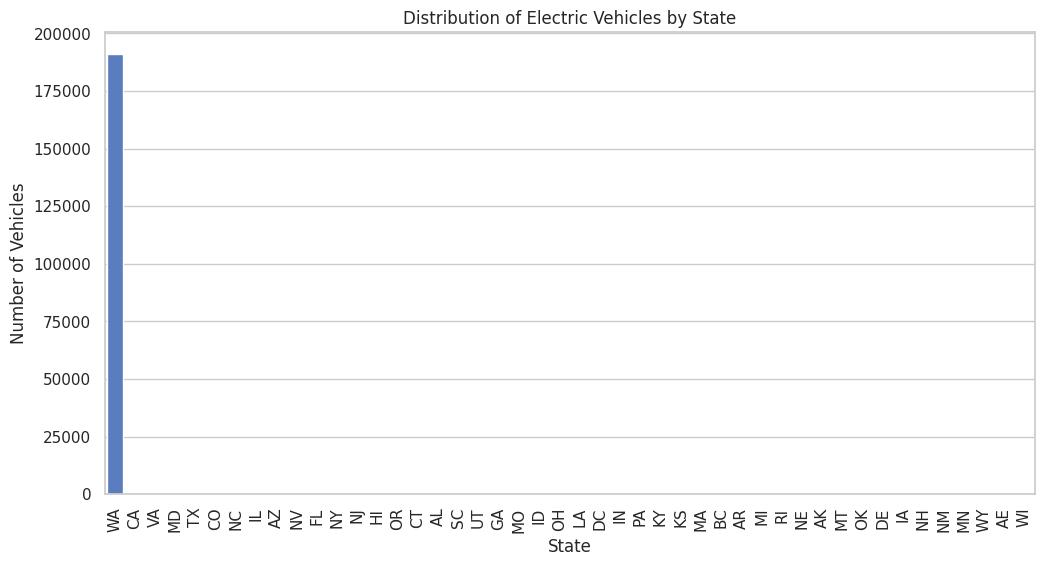

In [22]:
# Group data by 'State' and count the occurrences
state_distribution = df['State'].value_counts()

# Plotting the distribution of EVs across states
plt.figure(figsize=(12, 6))
sns.barplot(x=state_distribution.index, y=state_distribution.values, palette='muted')
plt.title('Distribution of Electric Vehicles by State')
plt.xlabel('State')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=90)
plt.show()

Part 2: Electric Range Analysis

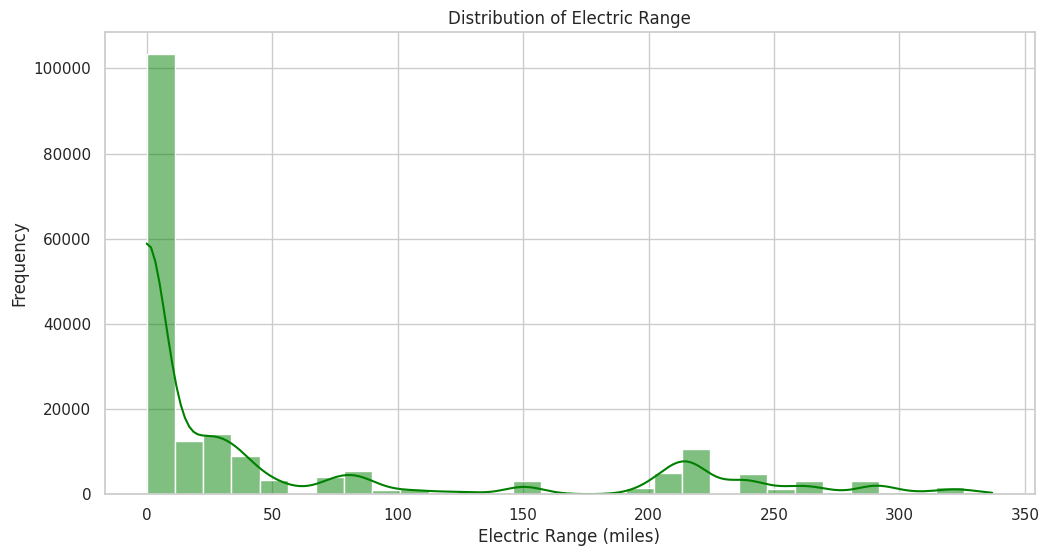

In [23]:
# Plotting the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='green')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

Part 3: Price Sensitivity Analysis

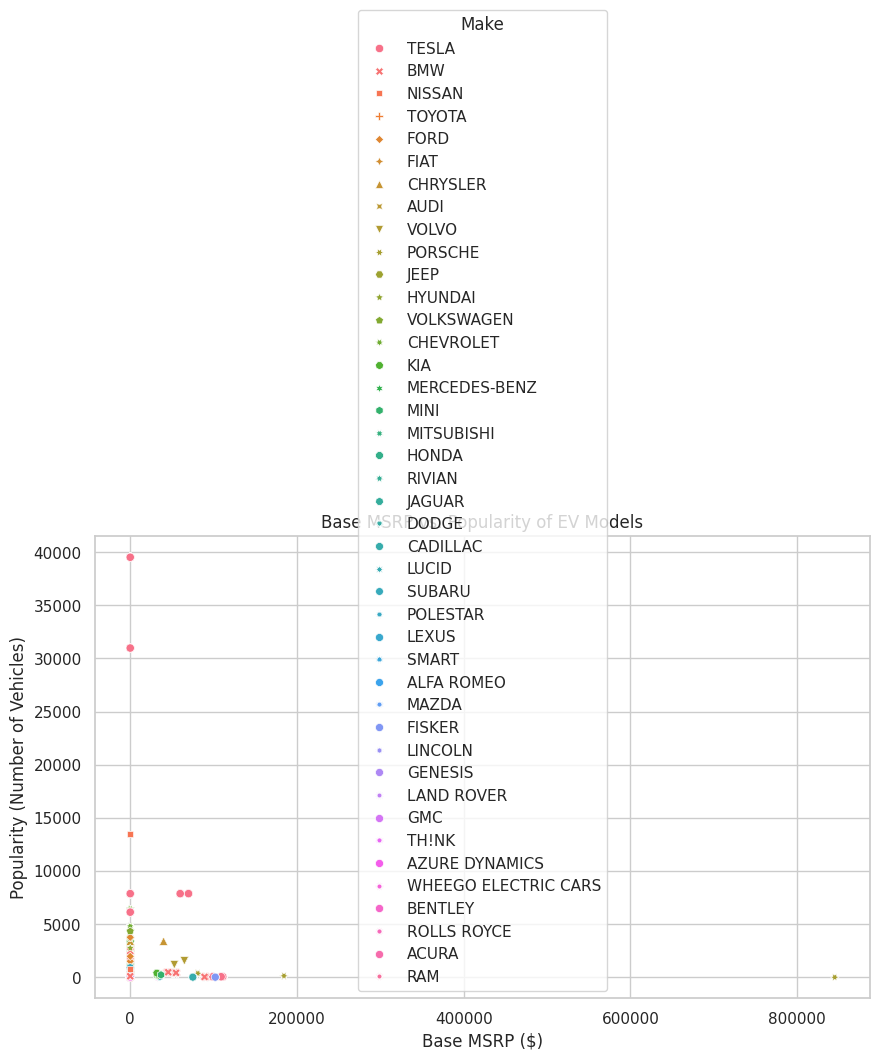

In [24]:
# Scatter plot of Base MSRP vs. popularity (number of vehicles per model)
popularity = df.groupby('Model')['Model'].count()
df_popularity = pd.DataFrame(popularity).rename(columns={'Model': 'Popularity'}).reset_index()
df_merged = pd.merge(df, df_popularity, on='Model', how='left')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='Base MSRP', y='Popularity', hue='Make', style='Make')
plt.title('Base MSRP vs. Popularity of EV Models')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Popularity (Number of Vehicles)')
plt.show()

Part 4: Legislative Impact Analysis

<ipython-input-25-b811be9ff075>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=legislative_impact.index, y=legislative_impact.values, palette='deep')


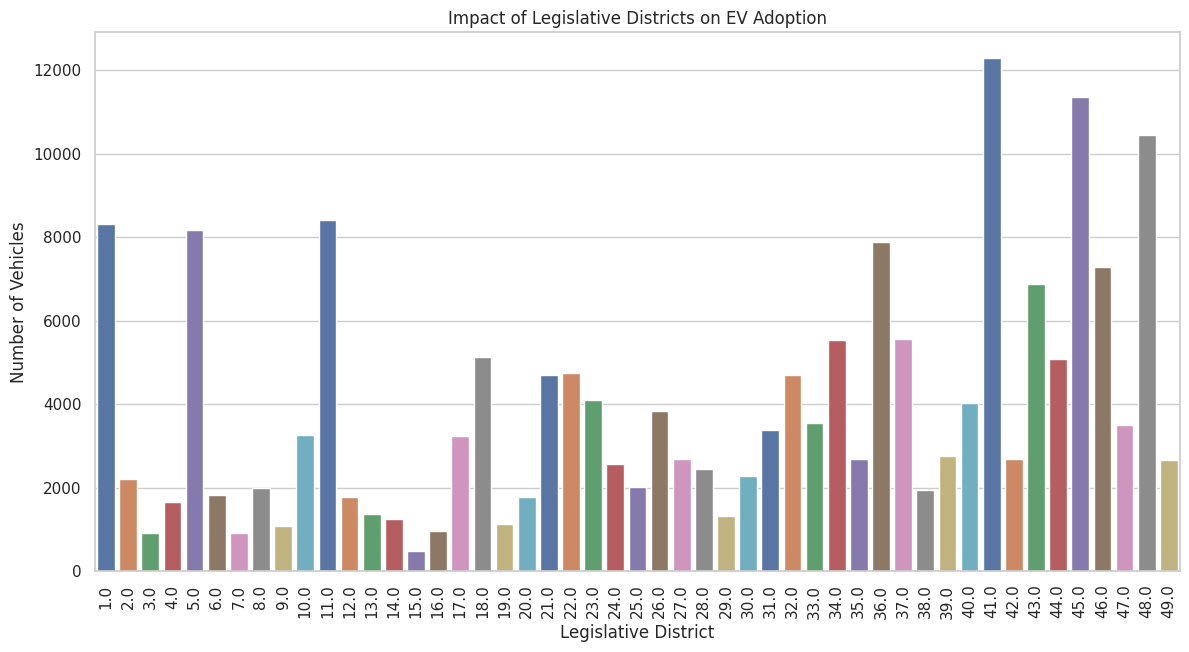

In [25]:
# Group data by 'Legislative District' and count the occurrences
legislative_impact = df['Legislative District'].value_counts()

# Plotting the impact of legislative districts on EV adoption
plt.figure(figsize=(14, 7))
sns.barplot(x=legislative_impact.index, y=legislative_impact.values, palette='deep')
plt.title('Impact of Legislative Districts on EV Adoption')
plt.xlabel('Legislative District')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=90)
plt.show()

Clustering

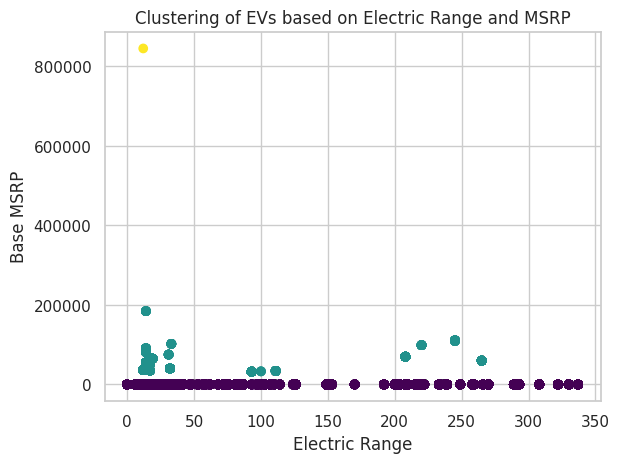

In [29]:
from sklearn.cluster import KMeans
# Selecting features for clustering
X = df[['Electric Range', 'Base MSRP']]

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_

# Plotting clusters
plt.scatter(df['Electric Range'], df['Base MSRP'], c=df['Cluster'], cmap='viridis')
plt.title('Clustering of EVs based on Electric Range and MSRP')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.show()